In [1]:
from bs4 import BeautifulSoup
import requests
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import prepare

In [2]:
df = prepare.clean_df()

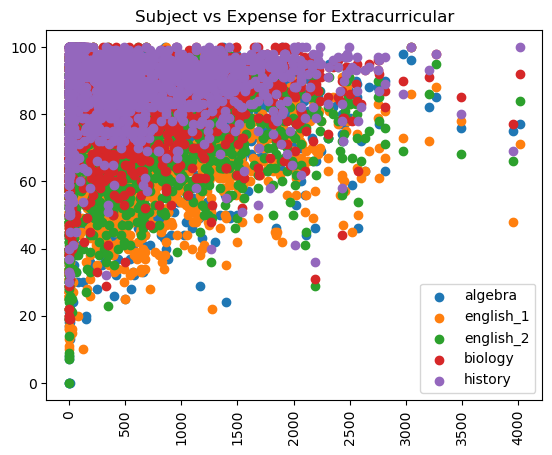

In [3]:
prepare.extra_v_sub(df)

(array([984., 361.,  20.,  13.,   7.,   1.,   4.,   0.,   0.,   1.]),
 array([ 3954. , 10527.3, 17100.6, 23673.9, 30247.2, 36820.5, 43393.8,
        49967.1, 56540.4, 63113.7, 69687. ]),
 <BarContainer object of 10 artists>)

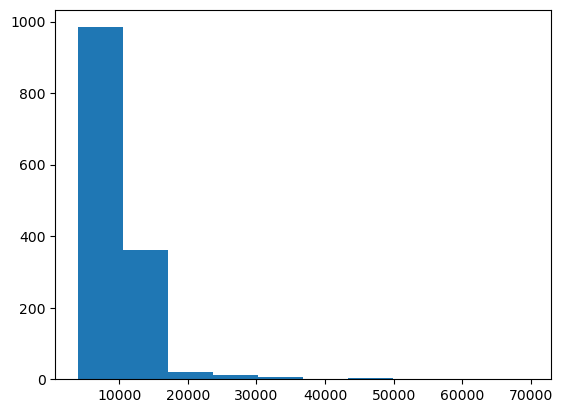

In [6]:
plt.hist(df.total_expend)

In [4]:
df

,school_id,english_1,english_2,algebra,biology,history,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu
0,1902001,67.0,82.0,95.0,88.0,93.0,1.2,34.3,55259.0,16.4,1852.0,10656.0,10.1,18.0,65.6,22.0
1,1903001,75.0,87.0,76.0,92.0,93.0,1.3,34.5,48689.0,21.6,2056.0,11177.0,8.3,27.2,51.2,29.4
2,1904001,78.0,80.0,90.0,87.0,88.0,4.7,42.2,51538.0,15.2,2151.0,10885.0,8.8,42.2,42.6,37.0
3,1906002,82.0,80.0,100.0,100.0,96.0,2.9,48.1,58500.0,20.4,1899.0,15043.0,11.9,20.5,59.1,9.8
4,1907001,64.0,66.0,82.0,83.0,83.0,13.8,79.9,52703.0,17.4,1504.0,11129.0,12.2,22.7,59.9,20.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,252901001,75.0,79.0,86.0,85.0,94.0,9.5,49.9,57874.0,10.5,1423.0,9852.0,13.1,13.1,76.3,22.9
1557,252903001,83.0,90.0,88.0,93.0,93.0,4.0,64.9,48047.0,34.8,2756.0,13508.0,7.7,24.9,40.3,27.9
1558,253901001,49.0,48.0,70.0,70.0,79.0,30.4,86.8,54771.0,9.9,113.0,7916.0,13.9,36.5,53.7,21.2
1559,254901001,48.0,62.0,51.0,76.0,88.0,1.3,81.1,51019.0,22.1,60.0,7617.0,16.9,29.6,48.3,20.6


In [7]:
high = df[df['econdis'] > 58.9]
low = df[df['econdis'] < 58.9]


In [22]:
low.shape

(665, 16)

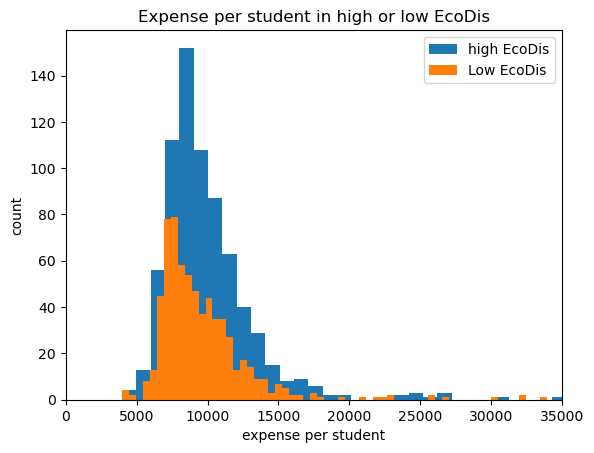

In [17]:
plt.hist(high.total_expend, bins = 65)
plt.hist(low.total_expend, bins = 65)
plt.xlim([0,35000])
classes = ['high EcoDis', 'Low EcoDis']
plt.legend(labels=classes)
plt.title('Expense per student in high or low EcoDis')
plt.xlabel('expense per student')
plt.ylabel('count')
plt.show()

In [18]:
def expense_per_stu(df):
    high = df[df['econdis'] > 58.9]
    low = df[df['econdis'] < 58.9]
    plt.hist(high.total_expend, bins = 65)
    plt.hist(low.total_expend, bins = 65)
    plt.xlim([0,35000])
    classes = ['high EcoDis', 'Low EcoDis']
    plt.legend(labels=classes)
    plt.title('Expense per student in high or low EcoDis')
    plt.xlabel('expense per student')
    plt.ylabel('count')
    return plt.show()

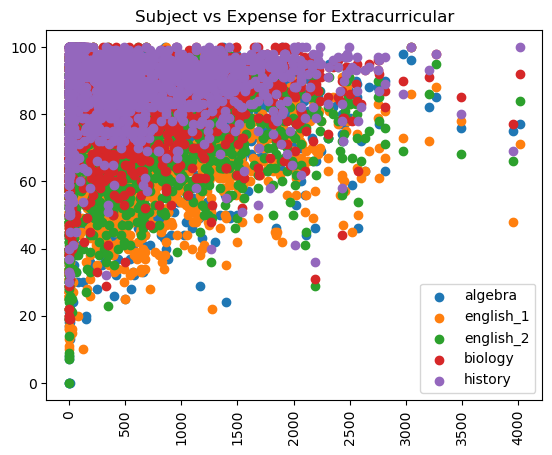

In [32]:
plt.xticks(rotation=90)
plt.scatter(x = df.extracurricular_expend, y = df.algebra)
plt.scatter(x = df.extracurricular_expend, y = df.english_1)
plt.scatter(x = df.extracurricular_expend, y = df.english_2)
plt.scatter(x = df.extracurricular_expend, y = df.biology)
plt.scatter(x = df.extracurricular_expend, y = df.history)
classes = ['algebra','english_1','english_2', 'biology', 'history']
plt.legend(labels=classes)
plt.title('Subject vs Expense for Extracurricular')
plt.show()

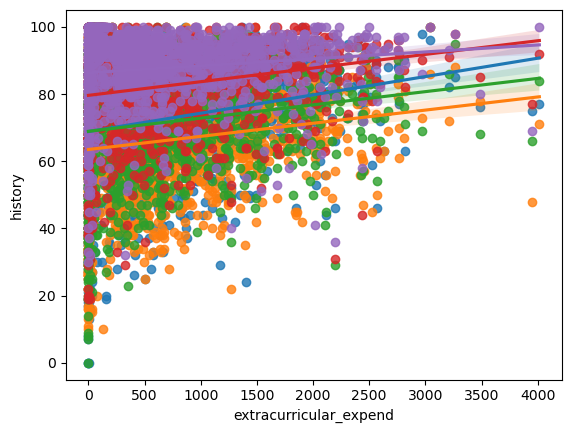

<Figure size 1000x600 with 0 Axes>

In [28]:
sns.regplot(x = df.extracurricular_expend, y = df.algebra)
sns.regplot(x = df.extracurricular_expend, y = df.english_1)
sns.regplot(x = df.extracurricular_expend, y = df.english_2)
sns.regplot(x = df.extracurricular_expend, y = df.biology)
sns.regplot(x = df.extracurricular_expend, y = df.history)
fig = plt.figure(figsize=(10,6))
classes = ['First','Second','Third', 'Fourth', 'Fifth']


In [47]:
def get_features(school_id):
    
    url1=f'https://rptsvr1.tea.texas.gov/cgi/sas/broker?_service=marykay&_program=perfrept.perfmast.sas&_debug=0&lev=C&id={school_id}&prgopt=reports%2Ftapr%2Fperformance.sas'
    url2=f'https://rptsvr1.tea.texas.gov/cgi/sas/broker?_service=marykay&_program=perfrept.perfmast.sas&_debug=0&ccyy=2022&lev=C&id={school_id}&prgopt=reports/tapr/student.sas'
    url3=f'https://rptsvr1.tea.texas.gov/cgi/sas/broker?_service=marykay&_program=perfrept.perfmast.sas&_debug=0&ccyy=2022&lev=C&id={school_id}&prgopt=reports/tapr/staff.sas'
    url4=f'https://rptsvr1.tea.texas.gov/cgi/sas/broker?_service=marykay&_service=appserv&_debug=0&_program=sfadhoc.new_Campus_actual21.sas&which_camp={school_id}'
    
    response1=requests.get(url1)
    soup1 = BeautifulSoup(response1.content, 'html.parser')
    response2=requests.get(url2)
    soup2 = BeautifulSoup(response2.content, 'html.parser')
    response3=requests.get(url3)
    soup3 = BeautifulSoup(response3.content, 'html.parser')
    response4=requests.get(url4)
    soup4 = BeautifulSoup(response4.content, 'html.parser')
    
    
    chinaspring={
        'school_id': [school_id],
        'eng1': [soup1.find_all('td', class_='r t data')[2].text], 
        'eng2': [soup1.find_all('td', class_='r t data')[98].text], 
        'algebra': [soup1.find_all('td', class_='r t data')[194].text],
        'biology': [soup1.find_all('td', class_='r t data')[290].text], 
        'history': [soup1.find_all('td', class_='r t data')[386].text], 
        'ebel': [soup2.find_all('td', class_='r b data')[241].text],
        'econdis': [soup2.find_all('td', class_='r b data')[217].text],
        'salary': [soup3.find_all('td', class_='r b data')[-43].text],
        'masters': [soup3.find_all('td', class_='r b data')[-114].text],
        'doct': [soup3.find_all('td', class_='r b data')[-110].text],
        'beginning_teach': [soup3.find_all('td', class_='r b data')[-106].text],
        'ex_5': [soup3.find_all('td', class_='r b data')[-102].text],
        'ex_10': [soup3.find_all('td', class_='r b data')[-98].text],
        'ex_1120': [soup3.find_all('td', class_='r b data')[-94].text],
        'ex_2130': [soup3.find_all('td', class_='r b data')[-90].text],
        'ex_plus': [soup3.find_all('td', class_='r b data')[-86].text],
        'extra_fund': [soup4.find_all('td', class_='r data')[91].text],
        'all_fund': [soup4.find_all('td', class_='r data')[31].text],
        'ratio': [soup3.find_all('td', class_='r b data')[-83].text]
    }
    add=pd.DataFrame(chinaspring)
    return add

In [48]:
def all_schools(school_id):
    all_info=pd.DataFrame({
        'school_id': [],
        'eng1': [], 
        'eng2': [], 
        'algebra': [],
        'biology': [], 
        'history': [], 
        'ebel': [],
        'econdis': [],
        'salary': [],
        'masters': [],
        'doct': [],
        'beginning_teach': [],
        'ex_5': [],
        'ex_10': [],
        'ex_1120': [],
        'ex_2130': [],
        'ex_plus': [],
        'extra_fund': [],
        'all_fund': [],
        'ratio': []
    })
    for n in school_id:
        try:
            school=get_features(n)
            all_info=pd.concat([all_info, school], ignore_index=True)
        except:
            continue
    return all_info

In [49]:

def error(school_id):
    scores = pd.DataFrame({})
    for i in school_id:
        try: 
            schools = get_features(i)
            scores = pd.concat([scores, schools])
            
        except:
            continue
    return scores
            

In [50]:
def nice_df():
    schools = pd.read_json('schools.json')
    high_schools = schools[schools['campus_type'] == 'High School']
    x = list(high_schools.id)
    strings = [str(y) for y in x]
    scores = pd.DataFrame({})
    for i in test:
        one_school = get_features(i)
        scores = pd.concat([scores, one_school])
    return scores

In [51]:
school = pd.read_csv('school_data.csv')
school

,Unnamed: 0,school_id,eng1,eng2,algebra,biology,history,ebel,econdis,salary,...,doct,beginning_teach,ex_5,ex_10,ex_1120,ex_2130,ex_plus,extra_fund,all_fund,ratio
0,0,1902001,67%,82%,95%,88%,93%,1.2%,34.3%,"$55,259",...,0.0%,0.0%,18.0%,16.4%,37.3%,22.5%,5.8%,"$1,852","$10,656",10.1
1,0,1903001,75%,87%,76%,92%,93%,1.3%,34.5%,"$48,689",...,0.0%,0.0%,27.2%,21.6%,29.6%,10.8%,10.8%,"$2,056","$11,177",8.3
2,0,1904001,78%,80%,90%,87%,88%,4.7%,42.2%,"$51,538",...,0.0%,5.0%,37.2%,15.2%,23.1%,11.4%,8.1%,"$2,151","$10,885",8.8
3,0,1906002,82%,80%,100%,100%,96%,2.9%,48.1%,"$58,500",...,0.0%,0.0%,20.5%,20.4%,37.1%,11.0%,11.0%,"$1,899","$15,043",11.9
4,0,1907001,64%,66%,82%,83%,83%,13.8%,79.9%,"$52,703",...,0.0%,3.5%,19.2%,17.4%,34.5%,11.7%,13.7%,"$1,504","$11,129",12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,0,252901001,75%,79%,86%,85%,94%,9.5%,49.9%,"$57,874",...,0.0%,3.9%,9.2%,10.5%,41.9%,27.2%,7.2%,"$1,423","$9,852",13.1
1557,0,252903001,83%,90%,88%,93%,93%,4.0%,64.9%,"$48,047",...,0.0%,9.1%,15.8%,34.8%,16.5%,13.0%,10.8%,"$2,756","$13,508",7.7
1558,0,253901001,49%,48%,70%,70%,79%,30.4%,86.8%,"$54,771",...,0.0%,17.2%,19.3%,9.9%,30.2%,17.8%,5.7%,$113,"$7,916",13.9
1559,0,254901001,48%,62%,51%,76%,88%,1.3%,81.1%,"$51,019",...,3.2%,7.7%,21.9%,22.1%,20.5%,24.6%,3.2%,$60,"$7,617",16.9


In [52]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1561 non-null   int64 
 1   school_id        1561 non-null   int64 
 2   eng1             1561 non-null   object
 3   eng2             1561 non-null   object
 4   algebra          1561 non-null   object
 5   biology          1561 non-null   object
 6   history          1561 non-null   object
 7   ebel             1561 non-null   object
 8   econdis          1561 non-null   object
 9   salary           1561 non-null   object
 10  masters          1561 non-null   object
 11  doct             1561 non-null   object
 12  beginning_teach  1561 non-null   object
 13  ex_5             1561 non-null   object
 14  ex_10            1561 non-null   object
 15  ex_1120          1561 non-null   object
 16  ex_2130          1561 non-null   object
 17  ex_plus          1561 non-null   

In [53]:
school = school.drop(columns = ['Unnamed: 0'])

In [54]:
school

,school_id,eng1,eng2,algebra,biology,history,ebel,econdis,salary,masters,doct,beginning_teach,ex_5,ex_10,ex_1120,ex_2130,ex_plus,extra_fund,all_fund,ratio
0,1902001,67%,82%,95%,88%,93%,1.2%,34.3%,"$55,259",22.0%,0.0%,0.0%,18.0%,16.4%,37.3%,22.5%,5.8%,"$1,852","$10,656",10.1
1,1903001,75%,87%,76%,92%,93%,1.3%,34.5%,"$48,689",29.4%,0.0%,0.0%,27.2%,21.6%,29.6%,10.8%,10.8%,"$2,056","$11,177",8.3
2,1904001,78%,80%,90%,87%,88%,4.7%,42.2%,"$51,538",37.0%,0.0%,5.0%,37.2%,15.2%,23.1%,11.4%,8.1%,"$2,151","$10,885",8.8
3,1906002,82%,80%,100%,100%,96%,2.9%,48.1%,"$58,500",9.8%,0.0%,0.0%,20.5%,20.4%,37.1%,11.0%,11.0%,"$1,899","$15,043",11.9
4,1907001,64%,66%,82%,83%,83%,13.8%,79.9%,"$52,703",20.8%,0.0%,3.5%,19.2%,17.4%,34.5%,11.7%,13.7%,"$1,504","$11,129",12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,252901001,75%,79%,86%,85%,94%,9.5%,49.9%,"$57,874",22.9%,0.0%,3.9%,9.2%,10.5%,41.9%,27.2%,7.2%,"$1,423","$9,852",13.1
1557,252903001,83%,90%,88%,93%,93%,4.0%,64.9%,"$48,047",27.9%,0.0%,9.1%,15.8%,34.8%,16.5%,13.0%,10.8%,"$2,756","$13,508",7.7
1558,253901001,49%,48%,70%,70%,79%,30.4%,86.8%,"$54,771",21.2%,0.0%,17.2%,19.3%,9.9%,30.2%,17.8%,5.7%,$113,"$7,916",13.9
1559,254901001,48%,62%,51%,76%,88%,1.3%,81.1%,"$51,019",17.4%,3.2%,7.7%,21.9%,22.1%,20.5%,24.6%,3.2%,$60,"$7,617",16.9


In [72]:
#this function takes in a list of dollar values in strings and converts them to float

def convert_dollars_to_float(x):
    fix = []
    blah = []
    something = [] #this list holds only the balance keys from the dictionary
    only_dollars = [] # this holds the values without the commas
    convert = []
    for d in x:
        d = d.replace(' ', '')
        fix.append(d)
    for e in fix:
        e = e.replace('-', '')
        blah.append(e)
        # this holds the converted values 
    for a in blah:
        a = a.strip('$')
        something.append(a)
    for b in something:
        b = b.replace(",","")
        only_dollars.append(b)
    for c in only_dollars:
        c = float(c)
        convert.append(c)

    return convert

In [73]:
school.iloc[203]

school_id                      31903001
eng1                             49%   
eng2                             68%   
algebra                          80%   
biology                          59%   
history                          87%   
ebel                              10.4%
econdis                           80.5%
salary                          $57,639
masters                           20.3%
doct                               0.0%
beginning_teach                    8.6%
ex_5                              24.3%
ex_10                             16.6%
ex_1120                           35.7%
ex_2130                           11.2%
ex_plus                            3.7%
extra_fund                         $703
all_fund                        $10,394
ratio                              14.8
Name: 204, dtype: object

In [74]:
school = school[school['salary'] != '-']

In [77]:
school = school[school['salary'] != '?']

In [79]:
school.salary = convert_dollars_to_float(school.salary)

/var/folders/9m/3m9g9yzs77j2m_79z47fjdr00000gq/T/ipykernel_16468/3952137847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school.salary = convert_dollars_to_float(school.salary)


In [81]:
school.all_fund = convert_dollars_to_float(school.all_fund)

/var/folders/9m/3m9g9yzs77j2m_79z47fjdr00000gq/T/ipykernel_16468/2968226382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school.all_fund = convert_dollars_to_float(school.all_fund)


In [83]:
school.extra_fund = convert_dollars_to_float(school.extra_fund)

/var/folders/9m/3m9g9yzs77j2m_79z47fjdr00000gq/T/ipykernel_16468/1788412683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school.extra_fund = convert_dollars_to_float(school.extra_fund)


In [84]:
school

,school_id,eng1,eng2,algebra,biology,history,ebel,econdis,salary,masters,doct,beginning_teach,ex_5,ex_10,ex_1120,ex_2130,ex_plus,extra_fund,all_fund,ratio
0,1902001,67%,82%,95%,88%,93%,1.2%,34.3%,55259.0,22.0%,0.0%,0.0%,18.0%,16.4%,37.3%,22.5%,5.8%,1852.0,10656.0,10.1
1,1903001,75%,87%,76%,92%,93%,1.3%,34.5%,48689.0,29.4%,0.0%,0.0%,27.2%,21.6%,29.6%,10.8%,10.8%,2056.0,11177.0,8.3
2,1904001,78%,80%,90%,87%,88%,4.7%,42.2%,51538.0,37.0%,0.0%,5.0%,37.2%,15.2%,23.1%,11.4%,8.1%,2151.0,10885.0,8.8
3,1906002,82%,80%,100%,100%,96%,2.9%,48.1%,58500.0,9.8%,0.0%,0.0%,20.5%,20.4%,37.1%,11.0%,11.0%,1899.0,15043.0,11.9
4,1907001,64%,66%,82%,83%,83%,13.8%,79.9%,52703.0,20.8%,0.0%,3.5%,19.2%,17.4%,34.5%,11.7%,13.7%,1504.0,11129.0,12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,252901001,75%,79%,86%,85%,94%,9.5%,49.9%,57874.0,22.9%,0.0%,3.9%,9.2%,10.5%,41.9%,27.2%,7.2%,1423.0,9852.0,13.1
1557,252903001,83%,90%,88%,93%,93%,4.0%,64.9%,48047.0,27.9%,0.0%,9.1%,15.8%,34.8%,16.5%,13.0%,10.8%,2756.0,13508.0,7.7
1558,253901001,49%,48%,70%,70%,79%,30.4%,86.8%,54771.0,21.2%,0.0%,17.2%,19.3%,9.9%,30.2%,17.8%,5.7%,113.0,7916.0,13.9
1559,254901001,48%,62%,51%,76%,88%,1.3%,81.1%,51019.0,17.4%,3.2%,7.7%,21.9%,22.1%,20.5%,24.6%,3.2%,60.0,7617.0,16.9


In [85]:
def change_dollars(df):
    school = school[school['salary'] != '-']
    school = school[school['salary'] != '?']
    school.salary = convert_dollars_to_float(school.salary)
    school.all_fund = convert_dollars_to_float(school.all_fund)
    school.extra_fund = convert_dollars_to_float(school.extra_fund)
    return df

In [86]:
len(school.eng1)

1540

In [87]:
school = school[school['eng1'] != '*']

In [88]:
len(school.eng1)

1540

In [93]:
pd.set_option('display.max_rows', None)

In [95]:
school.eng1[24]

'*         '

In [2]:
import prepare

In [183]:

school = prepare.clean_df()

In [184]:
def tts(df, stratify=None):
    '''
    removing your test data from the data
    '''
    train_validate, test=train_test_split(df, 
                                 train_size=.8, 
                                 random_state=137,
                                 stratify=None)
    '''
    splitting the remaining data into the train and validate groups
    '''            
    train, validate =train_test_split(train_validate, 
                                      test_size=.3, 
                                      random_state=137,
                                      stratify=None)
    return train, validate, test

In [185]:
school = school.drop(columns = [ 'school_id', 'english_1', 'english_2', 'biology', 'history'])

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
train, val, test = tts(school, 'algebra')

In [205]:
train

,algebra,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu
404,100.0,30.5,87.9,69483.0,26.9,38.0,7558.0,19.2,22.4,50.7,44.8
429,79.0,47.5,85.4,63990.0,20.2,13.0,24531.0,5.9,51.9,27.9,31.1
621,74.0,4.5,53.5,56116.0,5.2,1071.0,9636.0,11.3,29.7,65.2,22.8
1090,63.0,0.0,34.1,54056.0,13.0,2818.0,21893.0,8.3,28.2,58.8,23.7
598,96.0,2.8,29.2,46058.0,20.5,532.0,10824.0,7.3,45.2,34.2,20.5
...,...,...,...,...,...,...,...,...,...,...,...
1184,81.0,2.9,91.3,60411.0,3.5,1815.0,26893.0,3.7,26.3,70.2,24.4
1194,70.0,1.8,33.3,35060.0,20.0,56.0,4155.0,22.2,20.0,60.0,60.0
1401,71.0,30.6,90.3,59949.0,25.8,67.0,11612.0,15.9,28.1,46.1,17.8
985,79.0,0.4,44.8,51212.0,3.8,2215.0,11816.0,8.5,28.4,67.7,18.7


In [231]:
train

,algebra,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu
404,100.0,30.5,87.9,69483.0,26.9,38.0,7558.0,19.2,22.4,50.7,44.8
429,79.0,47.5,85.4,63990.0,20.2,13.0,24531.0,5.9,51.9,27.9,31.1
621,74.0,4.5,53.5,56116.0,5.2,1071.0,9636.0,11.3,29.7,65.2,22.8
1090,63.0,0.0,34.1,54056.0,13.0,2818.0,21893.0,8.3,28.2,58.8,23.7
598,96.0,2.8,29.2,46058.0,20.5,532.0,10824.0,7.3,45.2,34.2,20.5
...,...,...,...,...,...,...,...,...,...,...,...
1184,81.0,2.9,91.3,60411.0,3.5,1815.0,26893.0,3.7,26.3,70.2,24.4
1194,70.0,1.8,33.3,35060.0,20.0,56.0,4155.0,22.2,20.0,60.0,60.0
1401,71.0,30.6,90.3,59949.0,25.8,67.0,11612.0,15.9,28.1,46.1,17.8
985,79.0,0.4,44.8,51212.0,3.8,2215.0,11816.0,8.5,28.4,67.7,18.7


In [232]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

x_train = train.drop(columns=['algebra'])
y_train = train.algebra

x_validate = val.drop(columns=['algebra'])
y_validate = val.algebra

x_test = test.drop(columns=['algebra'])
y_test = test.algebra

In [233]:
from sklearn.feature_selection import SelectKBest, f_regression

In [234]:
import sklearn.preprocessing

In [235]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

In [236]:
import pandas as pd

In [237]:
school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1560
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   algebra                       1391 non-null   float64
 1   bilingual_or_english_learner  1391 non-null   float64
 2   econdis                       1391 non-null   float64
 3   salary                        1391 non-null   float64
 4   teacher_exp_6to10             1391 non-null   float64
 5   extracurricular_expend        1391 non-null   float64
 6   total_expend                  1391 non-null   float64
 7   student_teacher_ratio         1391 non-null   float64
 8   teacher_exp_0to5              1391 non-null   float64
 9   teacher_exp_11_plus           1391 non-null   float64
 10  high_edu                      1391 non-null   float64
dtypes: float64(11)
memory usage: 130.4 KB


In [238]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)



In [239]:
x_validate_scaled = pd.DataFrame(x_validate_scaled, columns= x_validate.columns)

In [241]:
x_train_scaled

,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu
0,0.306225,0.878758,0.840700,0.471103,0.010898,0.054828,0.543046,0.224,0.507,0.557908
1,0.476908,0.853707,0.723245,0.353765,0.003728,0.313039,0.102649,0.519,0.279,0.387298
2,0.045181,0.534068,0.554878,0.091068,0.307141,0.086441,0.281457,0.297,0.652,0.283935
3,0.000000,0.339679,0.510830,0.227671,0.808145,0.272907,0.182119,0.282,0.588,0.295143
4,0.028112,0.290581,0.339812,0.359019,0.152567,0.104514,0.149007,0.452,0.342,0.255293
...,...,...,...,...,...,...,...,...,...,...
773,0.029116,0.912826,0.646717,0.061296,0.520505,0.348972,0.029801,0.263,0.702,0.303861
774,0.018072,0.331663,0.104646,0.350263,0.016060,0.003058,0.642384,0.200,0.600,0.747198
775,0.307229,0.902806,0.636838,0.451839,0.019214,0.116502,0.433775,0.281,0.461,0.221669
776,0.004016,0.446894,0.450018,0.066550,0.635217,0.119605,0.188742,0.284,0.677,0.232877


In [242]:
x_train

,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu
404,30.5,87.9,69483.0,26.9,38.0,7558.0,19.2,22.4,50.7,44.8
429,47.5,85.4,63990.0,20.2,13.0,24531.0,5.9,51.9,27.9,31.1
621,4.5,53.5,56116.0,5.2,1071.0,9636.0,11.3,29.7,65.2,22.8
1090,0.0,34.1,54056.0,13.0,2818.0,21893.0,8.3,28.2,58.8,23.7
598,2.8,29.2,46058.0,20.5,532.0,10824.0,7.3,45.2,34.2,20.5
...,...,...,...,...,...,...,...,...,...,...
1184,2.9,91.3,60411.0,3.5,1815.0,26893.0,3.7,26.3,70.2,24.4
1194,1.8,33.3,35060.0,20.0,56.0,4155.0,22.2,20.0,60.0,60.0
1401,30.6,90.3,59949.0,25.8,67.0,11612.0,15.9,28.1,46.1,17.8
985,0.4,44.8,51212.0,3.8,2215.0,11816.0,8.5,28.4,67.7,18.7


In [243]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [244]:
# 1. Predict G3_pred_mean
alg_pred_mean = y_train['algebra'].mean()
y_train['alg_pred_mean'] = alg_pred_mean
y_validate['alg_pred_mean'] = alg_pred_mean



In [245]:
# 2. compute G3_pred_median
alg_pred_median = y_train['algebra'].median()
y_train['alg_pred_median'] = alg_pred_median
y_validate['alg_pred_median'] = alg_pred_median



In [246]:
from sklearn.metrics import mean_squared_error

In [247]:
# 3. RMSE of G3_pred_mean
rmse_train = mean_squared_error(y_train.algebra, y_train.alg_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.algebra, y_validate.alg_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of G3_pred_median
rmse_train = mean_squared_error(y_train.algebra, y_train.alg_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.algebra, y_validate.alg_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  17.83 
Validate/Out-of-Sample:  16.93
RMSE using Median
Train/In-Sample:  18.04 
Validate/Out-of-Sample:  17.32


In [248]:
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor

In [251]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(x_train_scaled, y_train.algebra)

# predict train
y_train['alg_pred_lm'] = lm.predict(x_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.algebra, y_train.alg_pred_lm)**(1/2)

# predict validate
y_validate['alg_pred_lm'] = lm.predict(x_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.algebra, y_validate.alg_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  16.140168494209746 
Validation/Out-of-Sample:  15.83574718729424


/Users/HerrickW/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [250]:
x_train

,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu
404,30.5,87.9,69483.0,26.9,38.0,7558.0,19.2,22.4,50.7,44.8
429,47.5,85.4,63990.0,20.2,13.0,24531.0,5.9,51.9,27.9,31.1
621,4.5,53.5,56116.0,5.2,1071.0,9636.0,11.3,29.7,65.2,22.8
1090,0.0,34.1,54056.0,13.0,2818.0,21893.0,8.3,28.2,58.8,23.7
598,2.8,29.2,46058.0,20.5,532.0,10824.0,7.3,45.2,34.2,20.5
...,...,...,...,...,...,...,...,...,...,...
1184,2.9,91.3,60411.0,3.5,1815.0,26893.0,3.7,26.3,70.2,24.4
1194,1.8,33.3,35060.0,20.0,56.0,4155.0,22.2,20.0,60.0,60.0
1401,30.6,90.3,59949.0,25.8,67.0,11612.0,15.9,28.1,46.1,17.8
985,0.4,44.8,51212.0,3.8,2215.0,11816.0,8.5,28.4,67.7,18.7


In [252]:
y_train

,algebra,alg_pred_mean,alg_pred_median,alg_pred_lm
404,100.0,73.232648,76.0,67.564322
429,79.0,73.232648,76.0,56.686930
621,74.0,73.232648,76.0,76.618542
1090,63.0,73.232648,76.0,76.879661
598,96.0,73.232648,76.0,79.091606
...,...,...,...,...
1184,81.0,73.232648,76.0,65.110095
1194,70.0,73.232648,76.0,84.059673
1401,71.0,73.232648,76.0,61.877631
985,79.0,73.232648,76.0,80.267694


In [253]:
from sklearn.svm import SVR
import numpy as np


In [254]:

X_test = np.arange(0.0, 5.0, 1)[:, np.newaxis]


In [255]:
X_test

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.]])

In [263]:
from sklearn.svm import SVR
rng = np.random.RandomState(1)


In [268]:


# Fit regression model
svr = SVR().fit(x_train_scaled, y_train.algebra)
# Predict


In [270]:
y_train['SVR_model'] = svr.predict(x_train_scaled)

In [271]:
mean_squared_error(y_train.algebra, y_train.SVR_model)** (1/2)

16.43819865771854

In [273]:
clean_df = prepare.clean_df()

In [274]:
clean_df.to_csv('clean_df')

In [276]:
school.econdis.mean()

59.3629043853343

In [284]:
low_ecodis = school[school['econdis'] < school.econdis.mean()].econdis

In [285]:
high_ecodis = school[school['econdis'] > school.econdis.mean()].econdis

In [282]:
from scipy.stats import ttest_ind

In [286]:
low_ecodis.var()

193.36826062967825

In [287]:
high_ecodis.var()

138.42431256815053

In [289]:
t, p = ttest_ind(high_ecodis, low_ecodis, equal_var=False)
t, p

(58.07597810349491, 0.0)

In [291]:
high_ecodis

4       79.9
5       67.5
8       60.0
11      81.2
14      64.1
        ... 
1555    60.2
1557    64.9
1558    86.8
1559    81.1
1560    84.8
Name: econdis, Length: 712, dtype: float64

In [ ]:
#do explore question for other subjects